### Importing the necessary libraries

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Loading the data



In [13]:
# Load the data 
titanic_df = pd.read_csv('C:/Users/Deepak/OneDrive/Desktop/CodSoft/Task-01/Titanic-Dataset.csv')


# Display the first few rows of the dataset
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


###  Data Preprocessing

In [14]:


# Handling missing data
titanic_df.isnull().sum()

# Fill missing values for 'Age' with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to too many missing values
titanic_df.drop('Cabin', axis=1, inplace=True)


In [15]:
# Convert categorical variables to numerical formats
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

### Feature Engineering

In [16]:
# Create a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Create a new feature 'IsAlone' to indicate if the passenger is alone
titanic_df['IsAlone'] = np.where(titanic_df['FamilySize'] == 1, 1, 0)

### Exploratory Data Analysis (EDA)

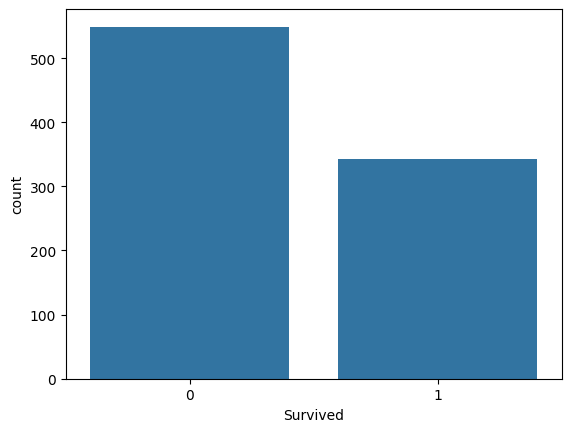

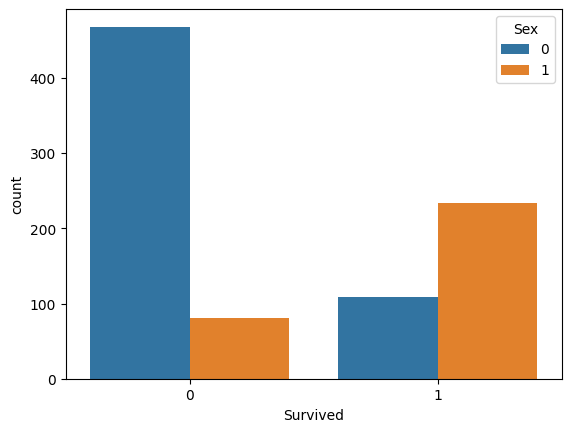

In [17]:
# Visualize survival count
sns.countplot(x='Survived', data=titanic_df)
plt.show()

# Visualize survival count based on gender
# MALE = 0, FEMALE = 1
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.show()


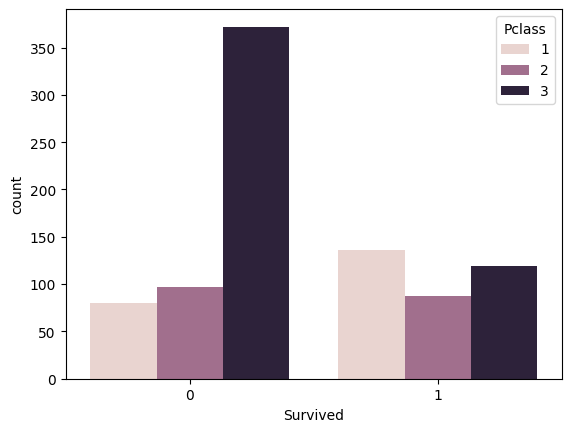

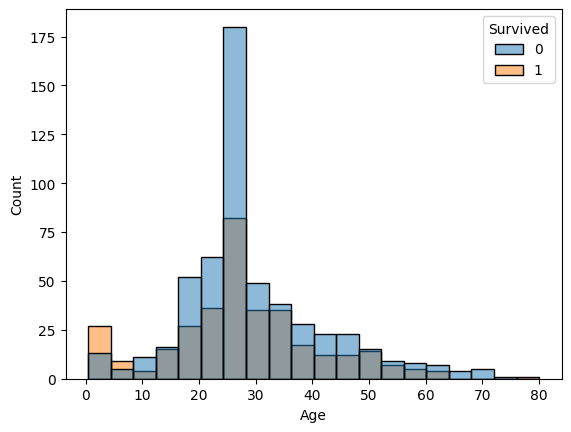

In [18]:
# Visualize survival count based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.show()

# Visualize survival count based on age
sns.histplot(x='Age', hue='Survived', data=titanic_df, bins=20)
plt.show()

 ### Model is Built

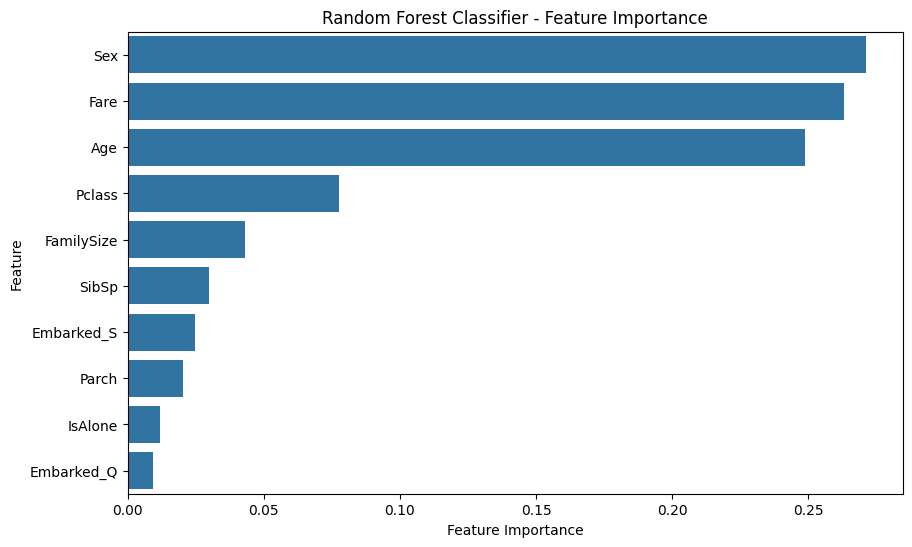

Accuracy: 0.8324022346368715

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



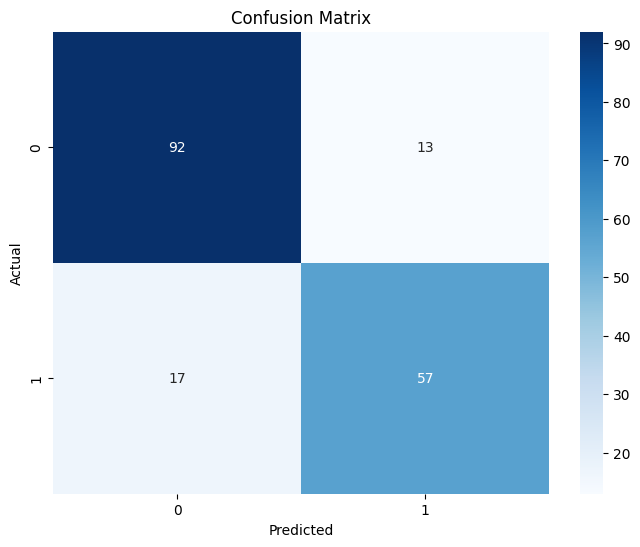

In [25]:
# Build and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances in a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
